**REGULARIZATION:** The processing of fighting overfitting (when we can't just get more training data)

# Reducing the networks's size
Which is the same as reduccing the number of learnable parameters in the model (the model's *capacity*). More parameters -> more *memorization capacity*.

If a network has limited memorization resources, in order to minimize tis loss, it'll have to learn compressed representations that have predictive power regarding the targets.

It must have enough parameters so it doesn't *underfit* (there's still progress to be made, it has yet to model all relevant patterns in the training data).

#### Movie-review classification network

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

Original model:

In [2]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_original = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5361 - accuracy: 0.7863 - val_loss: 0.4197 - val_accuracy: 0.8474
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3249 - accuracy: 0.8973 - val_loss: 0.3168 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2374 - accuracy: 0.9247 - val_loss: 0.2825 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1877 - accuracy: 0.9386 - val_loss: 0.2790 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1526 - accuracy: 0.9505 - val_loss: 0.2868 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1275 - accuracy: 0.9595 - val_loss: 0.2886 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.2981 - val_accuracy: 0.8844
Epoch 8/20
30

Smaller network:

In [3]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_smaller = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            verbose=0)

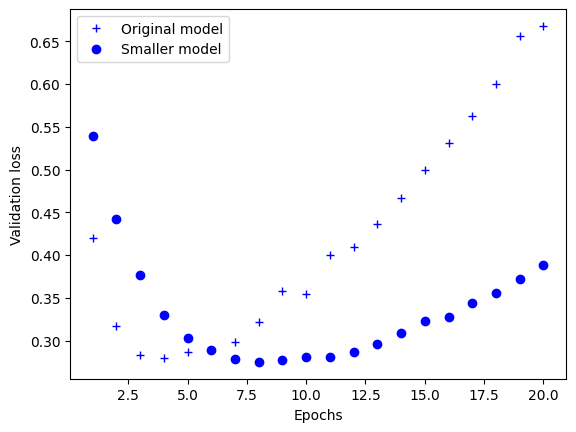

In [4]:
import matplotlib.pyplot as plt

history_dict = history_original.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

history_dict = history_smaller.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label='Smaller model')
plt.legend()


plt.show()

The smaller network starts overfitting later than the original one, and the performance degrades slower after that.

If the network were bigger than the original?

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_bigger = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            verbose=0)

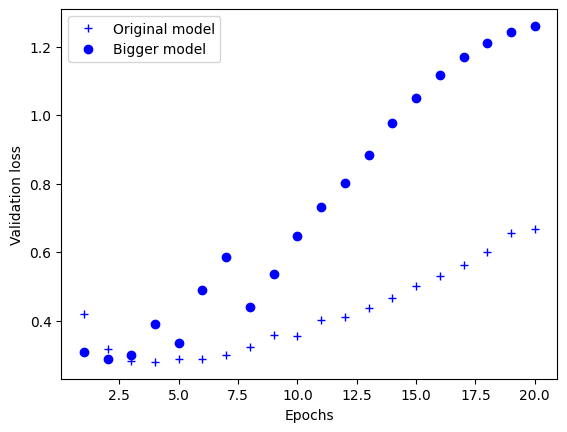

In [6]:
history_dict = history_original.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

history_dict = history_bigger.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label='Bigger model')
plt.legend()

plt.show()

Same as before, the smaller network (the original in this case) starts overfitting later than the bigger one, which begins to overfit after just 1 epoch and has a noiser validation loss.

# Adding weight regularization
As per *Occam's razor:* "given two explanations for something, the explanation most likely to be correct is the simplest one -- the one that makes fewer assumptions"

Weight regularization consists of putting constraints on the complexity of a network by forcing its weights to take only small values, which makes the
distribution of weight values more regular. This it’s done by adding to the loss function of the network a cost associated with having large weights. 

Two options:
- ***L1 regularization*** The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
- ***L2 regularization*** The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights).

In Keras, we just have to pass *weight regulatizer instances* to layers. So here's an example of L2 weight regularization to the movie-review classification network:

In [7]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
            activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
            activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_l2 = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            verbose=0)

```l2(0.001)``` means every coefficient in the weight metrix of the layer will ad ```0.001 * weight_coefficient_value``` to the total loss of the network 

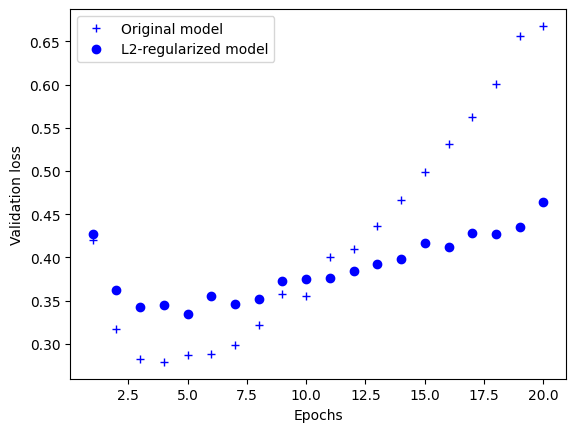

In [8]:
history_dict = history_original.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

history_dict = history_l2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label='L2-regularized model')
plt.legend()

plt.show()

The model regularizde with L2 has become more resistant to overfitting, despite both models having the same number of paramenters.

**IMPORTANT:** Because this penalty in *only* added at *training time*, the loss will be much higher at training that at test time!

# Adding dropout
It consists of randomly *dropping out* (setting to zero) a number of output features of the layer during training. The *dropout rate* is the fraction os the features that are zeroed out (usually between 0.2 and 0.5). 

Because we drop some of the units, at test time, we must scale down the output by the dropout rate. ***OR*** we can do both operations at training time, so we leave the output unchanged at test time.

*Why does this work?* randomly removing a different subset of neurons on each example would prevent "conspiracies" and thus reduce overfitting.

This is done in Keras adding ```Dropout``` layers:

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_dropout = model.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            verbose=0)

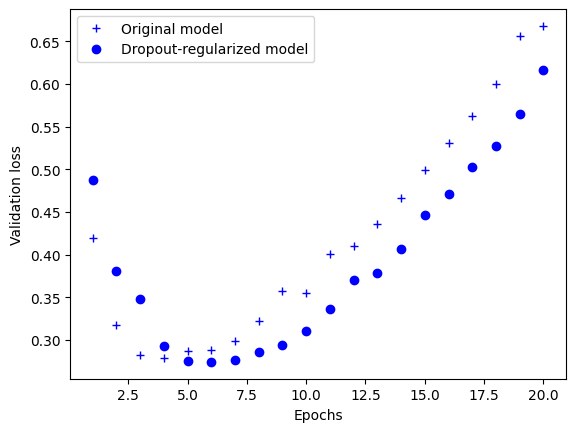

In [11]:
history_dict = history_original.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

history_dict = history_dropout.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values, 'bo', label='Dropout-regularized model')
plt.legend()

plt.show()

The dropout-regularized model overfits later